In [1]:
import tensorflow as tf

In [2]:
# Limitando a memória de GPU usada por ele
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    # Restringe o tf para usar somente a primeira GPU
    tf.config.set_visible_devices(gpus[0], 'GPU')
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [3]:
import keras as K

In [4]:
# Importar K e suas funções necessárias
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

In [5]:
# Inicializando a Rede Neural Convolucional
classifier = Sequential()

In [6]:
from tensorflow.keras.optimizers import Adam, SGD

# 32 features; formato 3x3; Imagens 64x64; Array 3D (RGB).

# Adicionando a Primeira Camada de Convolução
classifier.add(Conv2D(32, (3, 3), input_shape = (256, 256, 3), activation = 'relu'))

# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adicionando a Segunda Camada de Convolução
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Convolução mais complexa
classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adicionando Dropout
classifier.add(Dropout(0.1))

# Flattening - Transformando em 1D
classifier.add(Flatten())

# Full connection
classifier.add(Dense(units = 256, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compilando a rede
classifier.compile(optimizer = Adam(learning_rate=0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Criar o objeto com as regras de pré-processamento
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   width_shift_range=0.2,  # Deslocamento horizontal
                                   height_shift_range=0.2)  # Deslocamento vertical)

In [8]:
# Pré-processamento das imagens de treino
training_set = train_datagen.flow_from_directory('C:/Users/peter/OneDrive/Trabalhos/2024/Tópicos em Engenharia da Computação/dogs-vs-cats/train',
                                                 target_size = (256, 256),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 25000 images belonging to 2 classes.


Epoch 1/50
600/600 [==============================] - 342s 564ms/step - loss: 0.6489 - accuracy: 0.6184
Epoch 2/50
600/600 [==============================] - 327s 544ms/step - loss: 0.5753 - accuracy: 0.6943
Epoch 3/50
600/600 [==============================] - 321s 536ms/step - loss: 0.5314 - accuracy: 0.7345
Epoch 4/50
600/600 [==============================] - 312s 520ms/step - loss: 0.4988 - accuracy: 0.7564
Epoch 5/50
600/600 [==============================] - 313s 522ms/step - loss: 0.4816 - accuracy: 0.7695
Epoch 6/50
600/600 [==============================] - 314s 523ms/step - loss: 0.4528 - accuracy: 0.7879
Epoch 7/50
600/600 [==============================] - 314s 524ms/step - loss: 0.4260 - accuracy: 0.8044
Epoch 8/50
600/600 [==============================] - 316s 526ms/step - loss: 0.4064 - accuracy: 0.8168
Epoch 9/50
600/600 [==============================] - 307s 511ms/step - loss: 0.3978 - accuracy: 0.8238
Epoch 10/50
600/600 [==============================] - 310s 517m

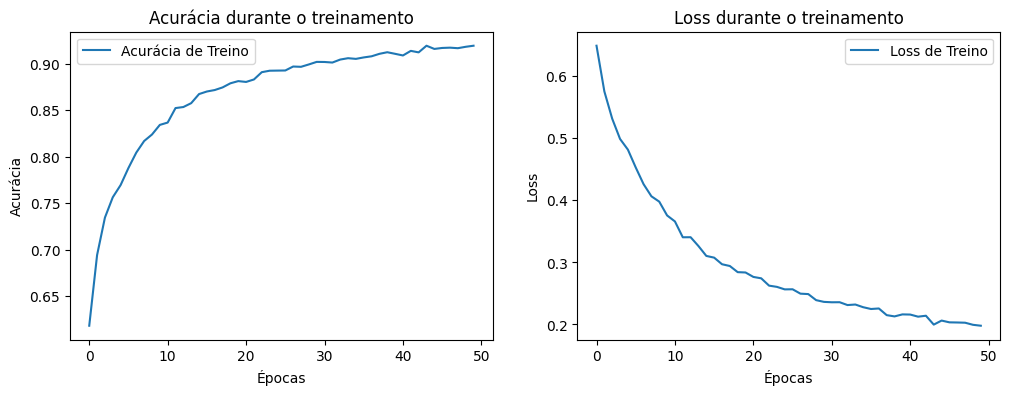

In [9]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import os

caminho_modelo_salvo = 'C:\Python\Tarefas\Cats vs. Dogs\meu_modelo_256x256_32_600_50.keras'

# Se o modelo já existir, simplesmente carrega ele
if os.path.exists(caminho_modelo_salvo):
    # Carregar o modelo salvo
    classifier = load_model(caminho_modelo_salvo)
    print("Modelo carregado com sucesso!")
else:
    # Treinando o modelo se ele não existir
    history = classifier.fit(training_set,
                             batch_size=32,
                             steps_per_epoch=600,
                             epochs=50)
    
    # Salvando o modelo no Google Drive
    classifier.save(caminho_modelo_salvo)
    print(f"Modelo treinado e salvo em: {caminho_modelo_salvo}")

    # Plotando os gráficos de accuracy e loss
    # Acurácia
    plt.figure(figsize=(12, 4))

    # Gráfico de Acurácia
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Acurácia de Treino')
    plt.title('Acurácia durante o treinamento')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.legend()

    # Gráfico de Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Loss de Treino')
    plt.title('Loss durante o treinamento')
    plt.xlabel('Épocas')
    plt.ylabel('Loss')
    plt.legend()

    plt.savefig('C:\Python\Tarefas\Cats vs. Dogs\\acuracia_e_loss_256x256_32_600_50.png')
    print("\n")
    plt.show()

1/1 [==============================] - 0s 40ms/step
Valor bruto: [[2.6778391e-06]]
Previsão: Gato.
Acurácia: 100.0 %.


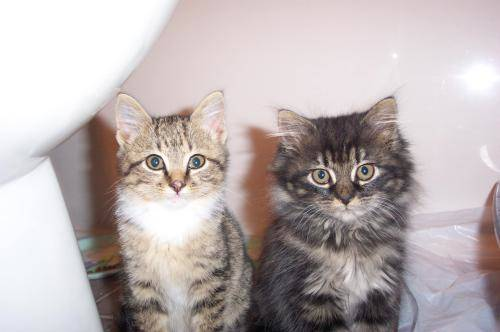

In [12]:
import numpy as np
from keras.utils import load_img, img_to_array
from IPython.display import Image

caminho_imagem = 'C:/Users/peter/OneDrive/Trabalhos/2024/Tópicos em Engenharia da Computação/dogs-vs-cats/test1/test1/2133.jpg'

# Carregando a imagem de teste
test_image = load_img(caminho_imagem, target_size=(256, 256))
test_image = img_to_array(test_image) / 255
test_image = np.expand_dims(test_image, axis=0)

# Fazendo a previsão usando o modelo classifier
result = classifier.predict(test_image)
class_indices = training_set.class_indices

print("Valor bruto:", result)

if result[0][0] >= 0.5:
    prediction = 'Cachorro.'
    accuracy = round(result[0][0] * 100, 2)  # A saída de previsão é uma probabilidade entre 0 e 1
else:
    prediction = 'Gato.'
    accuracy = round((1 - result[0][0]) * 100, 2)  # A saída de previsão é uma probabilidade entre 0 e 1

# Exibindo a previsão e a acurácia
print("Previsão:", prediction)
print("Acurácia:", accuracy, "%.")

# Exibindo a imagem
Image(caminho_imagem)
